   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/116M [00:00<?, ?B/s]

Epoch 1/10 | Loss: 0.1529 | Train Acc: 0.9494 | Val Acc: 0.9869
Epoch 2/10 | Loss: 0.0336 | Train Acc: 0.9892 | Val Acc: 0.9880
Epoch 3/10 | Loss: 0.0238 | Train Acc: 0.9919 | Val Acc: 0.9834
Epoch 4/10 | Loss: 0.0229 | Train Acc: 0.9924 | Val Acc: 0.9549
Epoch 5/10 | Loss: 0.0190 | Train Acc: 0.9943 | Val Acc: 0.9980
Epoch 6/10 | Loss: 0.0166 | Train Acc: 0.9949 | Val Acc: 0.9967
Epoch 7/10 | Loss: 0.0150 | Train Acc: 0.9956 | Val Acc: 0.9939
Epoch 8/10 | Loss: 0.0214 | Train Acc: 0.9934 | Val Acc: 0.9878
Epoch 9/10 | Loss: 0.0137 | Train Acc: 0.9959 | Val Acc: 0.9897
Epoch 10/10 | Loss: 0.0179 | Train Acc: 0.9948 | Val Acc: 0.9976

Classification Report:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       1.00      1.00      1.00       425
                        Tomato___Early_blight       1.00      1.00      1.00       480
                         Tomato___Late_blight       1.00      0.99      0

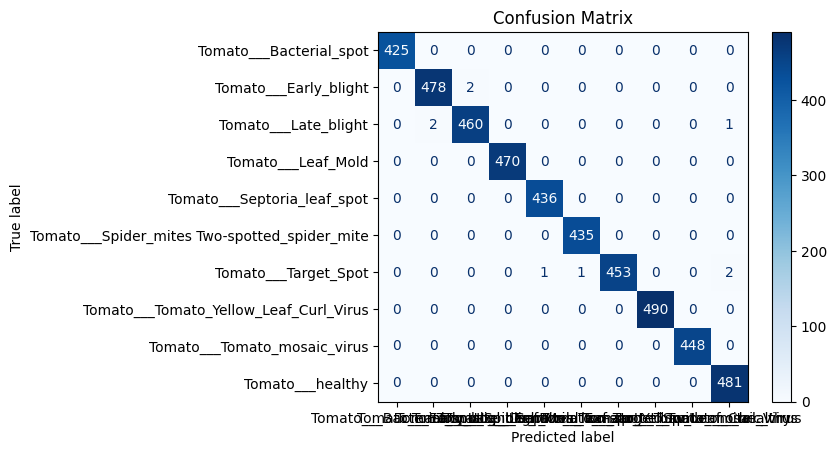

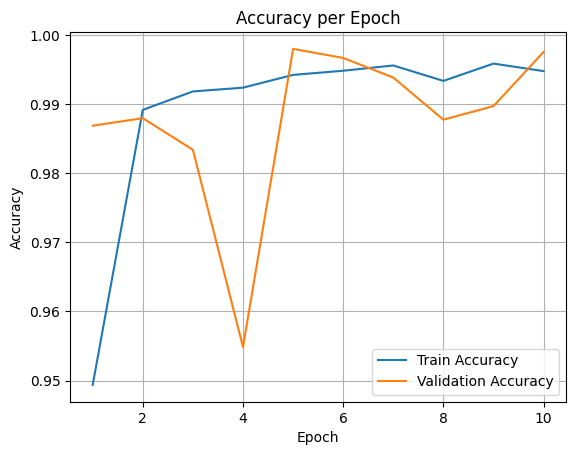

In [ ]:
# Install required libraries
!pip install timm torchvision

# Imports
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import timm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay
)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ==================== CONFIG ====================
config = {
    'train_dir': '/content/drive/MyDrive/tomato/train',
    'val_dir': '/content/drive/MyDrive/tomato/valid',
    'image_size': 224,
    'batch_size': 32,
    'num_epochs': 10,
    'learning_rate': 1e-4,
    'weight_decay': 1e-5,
    'model_name': 'maxvit_tiny_rw_224',
    'save_path': '/content/best_maxvit_model.pth'
}
# ===============================================

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Transforms
train_transforms = transforms.Compose([
    transforms.Resize((config['image_size'], config['image_size'])),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((config['image_size'], config['image_size'])),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Datasets and Loaders
train_dataset = datasets.ImageFolder(root=config['train_dir'], transform=train_transforms)
val_dataset = datasets.ImageFolder(root=config['val_dir'], transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=2)

num_classes = len(train_dataset.classes)
print(f"Classes: {train_dataset.classes}, Total Classes: {num_classes}")

# Custom MaxViT Model
class CustomMaxViT(nn.Module):
    def __init__(self, base_model, num_classes):
        super().__init__()
        self.backbone = base_model
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Linear(base_model.num_features, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Initialize model
base_model = timm.create_model(config['model_name'], pretrained=True, num_classes=0, global_pool='')
model = CustomMaxViT(base_model, num_classes).to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=config['learning_rate'], weight_decay=config['weight_decay'])

# Training Loop
best_accuracy = 0.0
train_accuracies, val_accuracies = [], []

for epoch in range(config['num_epochs']):
    model.train()
    running_loss = 0.0
    correct = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        correct += (outputs.argmax(1) == labels).sum().item()

    train_acc = correct / len(train_dataset)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_correct = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_correct += (outputs.argmax(1) == labels).sum().item()

    val_acc = val_correct / len(val_dataset)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{config['num_epochs']} | "
          f"Loss: {running_loss/len(train_dataset):.4f} | "
          f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    if val_acc > best_accuracy:
        best_accuracy = val_acc
        torch.save(model.state_dict(), config['save_path'])

# Load Best Model
model.load_state_dict(torch.load(config['save_path']))
model.eval()

# Evaluation
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images)
        preds = outputs.argmax(1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

# Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=val_dataset.classes))

# Scores
f1 = f1_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
precision = precision_score(all_labels, all_preds, average='macro')
print(f"F1 Score: {f1:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_dataset.classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Accuracy Curve
plt.plot(range(1, config['num_epochs'] + 1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, config['num_epochs'] + 1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy per Epoch")
plt.legend()
plt.grid(True)
plt.show()


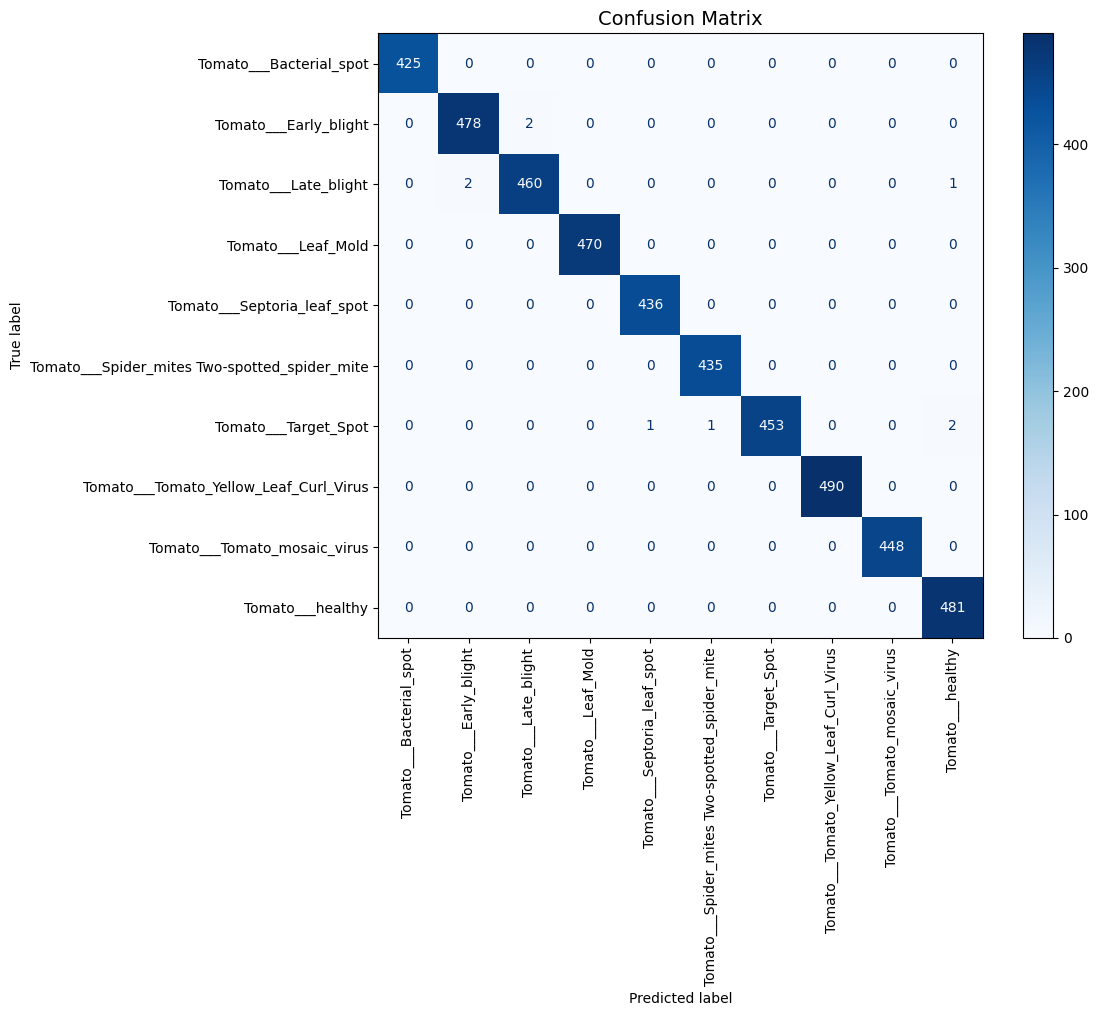

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_preds)
class_names = val_dataset.classes

fig, ax = plt.subplots(figsize=(12, 10))  # پراخ figure
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Rotate x-axis labels clearly
plt.xticks(rotation=90)

plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.grid(False)
plt.tight_layout()  # یا بدلول: plt.subplots(..., layout='constrained')
plt.show()
